# Verano FIME 2021

# (2016)

# PM2.5

In [35]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante1 = 'PM2_5'
# Se declaran las columnas a extraer de la base de datos
columns1 = ['timestamp', contaminante1]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante1 = pd.read_csv('filled.csv', usecols=columns1).dropna()
# Se convierten los strings a objeto datetime
strfdt1 = '%d-%b-%y %H'
dataframecontaminante1['timestamp'] = pd.to_datetime(dataframecontaminante1['timestamp'], errors = 'coerce', format=strfdt1)
# Se eliminan los espacios vacios
dataframecontaminante1 = dataframecontaminante1.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante1 = dataframecontaminante1.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00:00:00,99.00
1,2003-06-01 00:00:00,62.00
2,2003-06-01 00:00:00,29.00
3,2003-06-01 01:00:00,98.00
4,2003-06-01 01:00:00,75.00
...,...,...
528438,2018-12-31 23:00:00,22.58
528439,2018-12-31 23:00:00,199.00
528440,2018-12-31 23:00:00,111.00
528441,2018-12-31 23:00:00,295.00


In [36]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante1['timestamp'] = dataframecontaminante1['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante1

,timestamp,PM2_5
0,2003-06-01 00,99.00
1,2003-06-01 00,62.00
2,2003-06-01 00,29.00
3,2003-06-01 01,98.00
4,2003-06-01 01,75.00
...,...,...
528438,2018-12-31 23,22.58
528439,2018-12-31 23,199.00
528440,2018-12-31 23,111.00
528441,2018-12-31 23,295.00


In [37]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
año = '2016'
dataframecontaminanteaño1 = dataframecontaminante1.loc[dataframecontaminante1['timestamp'].str.startswith(año)]
dataframecontaminanteaño1 = dataframecontaminanteaño1.reset_index(drop=True)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2016-01-01 00,36.0
1,2016-01-01 00,80.0
2,2016-01-01 01,161.0
3,2016-01-01 01,215.0
4,2016-01-01 01,70.0
...,...,...
24192,2016-12-31 19,71.0
24193,2016-12-31 20,96.0
24194,2016-12-31 21,122.0
24195,2016-12-31 22,133.0


In [38]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño1['timestamp'] = pd.to_datetime(dataframecontaminanteaño1['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño1

,timestamp,PM2_5
0,2016-01-01 00:00:00,36.0
1,2016-01-01 00:00:00,80.0
2,2016-01-01 01:00:00,161.0
3,2016-01-01 01:00:00,215.0
4,2016-01-01 01:00:00,70.0
...,...,...
24192,2016-12-31 19:00:00,71.0
24193,2016-12-31 20:00:00,96.0
24194,2016-12-31 21:00:00,122.0
24195,2016-12-31 22:00:00,133.0


In [39]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño1['sem'] = dataframecontaminanteaño1['sem'].apply(lambda x: x.week)
dataframecontaminanteaño1

,timestamp,PM2_5,sem
0,2016-01-01 00:00:00,36.0,52
1,2016-01-01 00:00:00,80.0,52
2,2016-01-01 01:00:00,161.0,52
3,2016-01-01 01:00:00,215.0,52
4,2016-01-01 01:00:00,70.0,52
...,...,...,...
24192,2016-12-31 19:00:00,71.0,52
24193,2016-12-31 20:00:00,96.0,52
24194,2016-12-31 21:00:00,122.0,52
24195,2016-12-31 22:00:00,133.0,52


In [40]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante1 = dataframecontaminanteaño1['sem'].value_counts()
semanascontaminante1 = semanascontaminante1.sort_index()
semanascontaminante1

1     663
2     686
3     699
4     696
5     685
6     748
7     795
8     694
9     747
10    660
11    719
12    688
13    602
14    765
15    729
16    680
17    732
18    695
19    713
20    616
21    641
22    490
23    491
24    439
25    384
26    358
27    425
28    466
29    355
30    397
31    387
32    346
33    345
34    369
35    327
36    356
37    344
38    346
39    212
40    244
41    238
42    250
43    250
44    247
45    231
46    242
47    151
48    139
49    115
50    156
51    151
52    293
Name: sem, dtype: int64

In [41]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño1 = pd.DataFrame()
dataframesemanascontaminanteaño1['sem'] = semanascontaminante1.index
dataframesemanascontaminanteaño1[contaminante1] = ''
n = len(semanascontaminante1.index)
for i in range (n):
    registrossem = dataframecontaminanteaño1.loc[dataframecontaminanteaño1['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante1].mean()
    dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño1

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88267/3779165028.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño1[contaminante1][i] = promediocontaminanteañosem


,sem,PM2_5
0,1,23.707391
1,2,25.419825
2,3,22.809728
3,4,22.696839
4,5,18.982482
5,6,19.966578
6,7,25.719497
7,8,19.512968
8,9,23.53012
9,10,21.243939


In [42]:
dataset1 = []
for i in dataframesemanascontaminanteaño1.index:
    dataset1.append(dataframesemanascontaminanteaño1[contaminante1][i])
dataset1

[23.70739064856712,
 25.419825072886297,
 22.80972818311874,
 22.69683908045977,
 18.982481751824817,
 19.96657754010695,
 25.719496855345913,
 19.512968299711815,
 23.53012048192771,
 21.243939393939392,
 28.08623087621697,
 16.098837209302324,
 23.491694352159467,
 17.819607843137256,
 23.761316872427983,
 22.558823529411764,
 33.14207650273224,
 20.172661870503596,
 28.527349228611502,
 23.37987012987013,
 35.945397815912635,
 26.957142857142856,
 23.305498981670063,
 33.792710706150345,
 23.544270833333332,
 24.79608938547486,
 29.710588235294118,
 29.1931330472103,
 17.946478873239435,
 25.84382871536524,
 23.186046511627907,
 28.329479768786126,
 26.80289855072464,
 23.926829268292682,
 23.648318042813457,
 28.278089887640448,
 23.912790697674417,
 23.30057803468208,
 27.19811320754717,
 30.561475409836067,
 25.92436974789916,
 30.444,
 22.956,
 23.497975708502025,
 24.77056277056277,
 31.181818181818183,
 23.43046357615894,
 23.194244604316548,
 23.156521739130437,
 32.711538461

# PM10

In [43]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante2 = 'PM10'
# Se declaran las columnas a extraer de la base de datos
columns2 = ['timestamp', contaminante2]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante2 = pd.read_csv('filled.csv', usecols=columns2).dropna()
# Se convierten los strings a objeto datetime
strfdt2 = '%d-%b-%y %H'
dataframecontaminante2['timestamp'] = pd.to_datetime(dataframecontaminante2['timestamp'], errors = 'coerce', format=strfdt2)
# Se eliminan los espacios vacios
dataframecontaminante2 = dataframecontaminante2.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante2 = dataframecontaminante2.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante2

,timestamp,PM10
0,1993-01-01 00:00:00,41.0
1,1993-01-01 00:00:00,30.5
2,1993-01-01 00:00:00,60.0
3,1993-01-01 00:00:00,38.5
4,1993-01-01 01:00:00,41.0
...,...,...
1382706,2018-12-31 23:00:00,445.0
1382707,2018-12-31 23:00:00,134.0
1382708,2018-12-31 23:00:00,392.0
1382709,2018-12-31 23:00:00,40.0


In [1]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante2['timestamp'] = dataframecontaminante2['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante2

NameError: name 'dataframecontaminante2' is not defined

In [ ]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño2 = dataframecontaminante2.loc[dataframecontaminante2['timestamp'].str.startswith(año)]
dataframecontaminanteaño2 = dataframecontaminanteaño2.reset_index(drop=True)
dataframecontaminanteaño2

,timestamp,PM10
0,2016-01-01 00,49.0
1,2016-01-01 00,109.0
2,2016-01-01 00,84.0
3,2016-01-01 00,102.0
4,2016-01-01 00,82.0
...,...,...
84267,2016-12-31 23,149.0
84268,2016-12-31 23,143.0
84269,2016-12-31 23,280.0
84270,2016-12-31 23,364.0


In [ ]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño2['timestamp'] = pd.to_datetime(dataframecontaminanteaño2['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño2

,timestamp,PM10
0,2016-01-01 00:00:00,49.0
1,2016-01-01 00:00:00,109.0
2,2016-01-01 00:00:00,84.0
3,2016-01-01 00:00:00,102.0
4,2016-01-01 00:00:00,82.0
...,...,...
84267,2016-12-31 23:00:00,149.0
84268,2016-12-31 23:00:00,143.0
84269,2016-12-31 23:00:00,280.0
84270,2016-12-31 23:00:00,364.0


In [ ]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño2['sem'] = dataframecontaminanteaño2['sem'].apply(lambda x: x.week)
dataframecontaminanteaño2

,timestamp,PM10,sem
0,2016-01-01 00:00:00,49.0,52
1,2016-01-01 00:00:00,109.0,52
2,2016-01-01 00:00:00,84.0,52
3,2016-01-01 00:00:00,102.0,52
4,2016-01-01 00:00:00,82.0,52
...,...,...,...
84267,2016-12-31 23:00:00,149.0,52
84268,2016-12-31 23:00:00,143.0,52
84269,2016-12-31 23:00:00,280.0,52
84270,2016-12-31 23:00:00,364.0,52


In [ ]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante2 = dataframecontaminanteaño2['sem'].value_counts()
semanascontaminante2 = semanascontaminante2.sort_index()
semanascontaminante2

1     1615
2     1621
3     1639
4     1546
5     1679
6     1672
7     1654
8     1639
9     1650
10    1578
11    1657
12    1579
13    1618
14    1649
15    1633
16    1653
17    1605
18    1638
19    1657
20    1646
21    1599
22    1609
23    1596
24    1645
25    1657
26    1637
27    1654
28    1665
29    1599
30    1649
31    1577
32    1653
33    1638
34    1604
35    1606
36    1612
37    1659
38    1618
39    1559
40    1632
41    1609
42    1655
43    1662
44    1616
45    1543
46    1640
47    1594
48    1523
49    1401
50    1500
51    1490
52    1943
Name: sem, dtype: int64

In [ ]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño2 = pd.DataFrame()
dataframesemanascontaminanteaño2['sem'] = semanascontaminante2.index
dataframesemanascontaminanteaño2[contaminante2] = ''
n = len(semanascontaminante2.index)
for i in range (n):
    registrossem = dataframecontaminanteaño2.loc[dataframecontaminanteaño2['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante2].mean()
    dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño2

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88267/1374211484.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño2[contaminante2][i] = promediocontaminanteañosem


,sem,PM10
0,1,54.398762
1,2,63.963603
2,3,68.893228
3,4,74.909444
4,5,64.983919
5,6,73.416866
6,7,76.770254
7,8,62.564979
8,9,63.040606
9,10,56.055133


In [ ]:
dataset2 = []
for i in dataframesemanascontaminanteaño2.index:
    dataset2.append(dataframesemanascontaminanteaño2[contaminante2][i])
dataset2

[54.39876160990712,
 63.96360271437384,
 68.89322757779134,
 74.90944372574386,
 64.98391899940441,
 73.41686602870813,
 76.770253929867,
 62.56497864551556,
 63.04060606060606,
 56.055133079847906,
 72.84550392275196,
 54.927802406586444,
 67.62608158220024,
 53.17586416009703,
 55.17942437232088,
 54.90078644888082,
 90.11651090342679,
 54.71550671550671,
 65.96137598068799,
 48.10571081409478,
 75.29268292682927,
 51.228713486637666,
 50.43358395989975,
 64.7775075987842,
 52.84007242003621,
 53.39034819792303,
 65.32103990326482,
 84.05645645645646,
 42.78924327704816,
 49.61006670709521,
 53.85859226379201,
 53.38354506957048,
 43.20879120879121,
 46.97755610972568,
 41.73848069738481,
 57.559553349875934,
 44.680530440024114,
 47.828182941903584,
 44.5227710070558,
 58.60232843137255,
 53.10689869484152,
 63.629607250755285,
 52.96389891696751,
 47.77660891089109,
 40.36681788723266,
 79.20975609756097,
 68.73462986198244,
 68.57846355876559,
 53.990007137758745,
 90.443333333333

# NOX

In [ ]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante3 = 'NOX'
# Se declaran las columnas a extraer de la base de datos
columns3 = ['timestamp', contaminante3]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante3 = pd.read_csv('filled.csv', usecols=columns3).dropna()
# Se convierten los strings a objeto datetime
strfdt3 = '%d-%b-%y %H'
dataframecontaminante3['timestamp'] = pd.to_datetime(dataframecontaminante3['timestamp'], errors = 'coerce', format=strfdt3)
# Se eliminan los espacios vacios
dataframecontaminante3 = dataframecontaminante3.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante3 = dataframecontaminante3.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00:00:00,6.750000
1,1993-01-01 00:00:00,8.500000
2,1993-01-01 00:00:00,11.000000
3,1993-01-01 00:00:00,17.500000
4,1993-01-01 01:00:00,4.000000
...,...,...
1128925,2018-12-31 23:00:00,74.400002
1128926,2018-12-31 23:00:00,207.000000
1128927,2018-12-31 23:00:00,27.000000
1128928,2018-12-31 23:00:00,70.099998


In [ ]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante3['timestamp'] = dataframecontaminante3['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante3

,timestamp,NOX
0,1993-01-01 00,6.750000
1,1993-01-01 00,8.500000
2,1993-01-01 00,11.000000
3,1993-01-01 00,17.500000
4,1993-01-01 01,4.000000
...,...,...
1128925,2018-12-31 23,74.400002
1128926,2018-12-31 23,207.000000
1128927,2018-12-31 23,27.000000
1128928,2018-12-31 23,70.099998


In [ ]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño3 = dataframecontaminante3.loc[dataframecontaminante3['timestamp'].str.startswith(año)]
dataframecontaminanteaño3 = dataframecontaminanteaño3.reset_index(drop=True)
dataframecontaminanteaño3

,timestamp,NOX
0,2016-01-01 00,9.400000
1,2016-01-01 00,4.000000
2,2016-01-01 00,22.300000
3,2016-01-01 00,12.900000
4,2016-01-01 00,28.300000
...,...,...
37493,2016-12-31 22,46.800000
37494,2016-12-31 23,36.200001
37495,2016-12-31 23,15.200000
37496,2016-12-31 23,73.300003


In [ ]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño3['timestamp'] = pd.to_datetime(dataframecontaminanteaño3['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño3

,timestamp,NOX
0,2016-01-01 00:00:00,9.400000
1,2016-01-01 00:00:00,4.000000
2,2016-01-01 00:00:00,22.300000
3,2016-01-01 00:00:00,12.900000
4,2016-01-01 00:00:00,28.300000
...,...,...
37493,2016-12-31 22:00:00,46.800000
37494,2016-12-31 23:00:00,36.200001
37495,2016-12-31 23:00:00,15.200000
37496,2016-12-31 23:00:00,73.300003


In [ ]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño3['sem'] = dataframecontaminanteaño3['sem'].apply(lambda x: x.week)
dataframecontaminanteaño3

,timestamp,NOX,sem
0,2016-01-01 00:00:00,9.400000,52
1,2016-01-01 00:00:00,4.000000,52
2,2016-01-01 00:00:00,22.300000,52
3,2016-01-01 00:00:00,12.900000,52
4,2016-01-01 00:00:00,28.300000,52
...,...,...,...
37493,2016-12-31 22:00:00,46.800000,52
37494,2016-12-31 23:00:00,36.200001,52
37495,2016-12-31 23:00:00,15.200000,52
37496,2016-12-31 23:00:00,73.300003,52


In [ ]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante3 = dataframecontaminanteaño3['sem'].value_counts()
semanascontaminante3 = semanascontaminante3.sort_index()
semanascontaminante3

1      908
2      856
3      892
4      767
5      727
6      747
7      711
8      689
9      729
10     774
11     790
12     739
13     718
14     563
15     572
16     575
17     677
18     748
19     766
20     756
21     728
22     755
23     669
24     638
25     657
26     658
27     656
28     486
29     443
30     498
31     471
32     490
33     497
34     495
35     483
36     432
37     669
38     659
39     699
40     751
41     822
42     833
43     816
44     937
45     922
46     965
47    1001
48     945
49     996
50    1008
51     784
52     931
Name: sem, dtype: int64

In [ ]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño3 = pd.DataFrame()
dataframesemanascontaminanteaño3['sem'] = semanascontaminante3.index
dataframesemanascontaminanteaño3[contaminante3] = ''
n = len(semanascontaminante3.index)
for i in range (n):
    registrossem = dataframecontaminanteaño3.loc[dataframecontaminanteaño3['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante3].mean()
    dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño3

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88267/802629888.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño3[contaminante3][i] = promediocontaminanteañosem


,sem,NOX
0,1,27.470044
1,2,31.803154
2,3,34.425224
3,4,38.430639
4,5,28.544429
5,6,33.763989
6,7,27.148664
7,8,19.926705
8,9,22.602606
9,10,22.93708


In [ ]:
dataset3 = []
for i in dataframesemanascontaminanteaño3.index:
    dataset3.append(dataframesemanascontaminanteaño3[contaminante3][i])
dataset3

[27.470044052863436,
 31.803154205607477,
 34.42522421524664,
 38.43063885267275,
 28.54442916093535,
 33.76398929049531,
 27.148663853727147,
 19.926705370101597,
 22.602606310013716,
 22.937080103359175,
 28.419367088607594,
 19.64722598105548,
 64.5642061281337,
 18.517761989342805,
 18.691083916083915,
 16.84173913043478,
 20.548892171344168,
 17.627139037433157,
 18.005352480417756,
 18.59140211640212,
 20.3478021978022,
 20.470728476821193,
 21.69850523168909,
 19.30626959247649,
 16.051445966514457,
 18.79665653495441,
 19.248170731707315,
 16.181069958847736,
 14.822573363431152,
 15.58875502008032,
 14.890445859872612,
 17.184285714285714,
 17.73903420523139,
 16.16121212121212,
 19.711387163561074,
 19.50648148148148,
 20.31913303437967,
 19.144309559939302,
 21.682975679542206,
 23.42356857523302,
 23.54975669099757,
 27.045138055222086,
 26.37573529411765,
 24.630309498399146,
 26.77418655097614,
 38.917202072538856,
 31.771428571428572,
 29.904021164021167,
 30.35481927710

# NO2

In [ ]:
# Se importan las librerias necesarias
import pandas as pd
# Se declara una variable con el nombre del contaminante a analizar
contaminante4 = 'NO2'
# Se declaran las columnas a extraer de la base de datos
columns4 = ['timestamp', contaminante4]
# Se lee el archivo y los datos recuperados se guardan en 'dataframecontaminante'
dataframecontaminante4 = pd.read_csv('filled.csv', usecols=columns4).dropna()
# Se convierten los strings a objeto datetime
strfdt4 = '%d-%b-%y %H'
dataframecontaminante4['timestamp'] = pd.to_datetime(dataframecontaminante4['timestamp'], errors = 'coerce', format=strfdt4)
# Se eliminan los espacios vacios
dataframecontaminante4 = dataframecontaminante4.dropna()
# Se acomoda el indice empezando en 0 con un incremento de 1
dataframecontaminante4 = dataframecontaminante4.reset_index(drop=True)
# Se imprime 'dataframecontaminante'
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00:00:00,5.750000
1,1993-01-01 00:00:00,11.000000
2,1993-01-01 00:00:00,6.750000
3,1993-01-01 00:00:00,14.250000
4,1993-01-01 01:00:00,3.250000
...,...,...
1130352,2018-12-31 23:00:00,21.600000
1130353,2018-12-31 23:00:00,31.400000
1130354,2018-12-31 23:00:00,8.400000
1130355,2018-12-31 23:00:00,11.800000


In [ ]:
# Los datos de la columna 'timestamp' se vuelven a convertir a strings
dataframecontaminante4['timestamp'] = dataframecontaminante4['timestamp'].apply(lambda x: x.strftime('%Y-%m-%d %H'))
dataframecontaminante4

,timestamp,NO2
0,1993-01-01 00,5.750000
1,1993-01-01 00,11.000000
2,1993-01-01 00,6.750000
3,1993-01-01 00,14.250000
4,1993-01-01 01,3.250000
...,...,...
1130352,2018-12-31 23,21.600000
1130353,2018-12-31 23,31.400000
1130354,2018-12-31 23,8.400000
1130355,2018-12-31 23,11.800000


In [ ]:
# Se guardan los datos de 'año' en 'dataframecontaminanteaño'
dataframecontaminanteaño4 = dataframecontaminante4.loc[dataframecontaminante4['timestamp'].str.startswith(año)]
dataframecontaminanteaño4 = dataframecontaminanteaño4.reset_index(drop=True)
dataframecontaminanteaño4

,timestamp,NO2
0,2016-01-01 00,7.200000
1,2016-01-01 00,1.500000
2,2016-01-01 00,9.200000
3,2016-01-01 00,7.400000
4,2016-01-01 00,10.500000
...,...,...
37493,2016-12-31 22,25.600000
37494,2016-12-31 23,18.600000
37495,2016-12-31 23,10.900000
37496,2016-12-31 23,39.099998


In [ ]:
# Se convierten los strings a objeto datetime
strfdt = '%Y-%m-%d %H'
dataframecontaminanteaño4['timestamp'] = pd.to_datetime(dataframecontaminanteaño4['timestamp'], errors = 'coerce', format=strfdt)
dataframecontaminanteaño4

,timestamp,NO2
0,2016-01-01 00:00:00,7.200000
1,2016-01-01 00:00:00,1.500000
2,2016-01-01 00:00:00,9.200000
3,2016-01-01 00:00:00,7.400000
4,2016-01-01 00:00:00,10.500000
...,...,...
37493,2016-12-31 22:00:00,25.600000
37494,2016-12-31 23:00:00,18.600000
37495,2016-12-31 23:00:00,10.900000
37496,2016-12-31 23:00:00,39.099998


In [ ]:
# Se importan las librerias necesarias
from epiweeks import Week, date
# Se agrega una nueva columna con los numeros de semana
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['timestamp'].apply(lambda x: date(x.year, x.month, x.day))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: Week.fromdate(x))
dataframecontaminanteaño4['sem'] = dataframecontaminanteaño4['sem'].apply(lambda x: x.week)
dataframecontaminanteaño4

,timestamp,NO2,sem
0,2016-01-01 00:00:00,7.200000,52
1,2016-01-01 00:00:00,1.500000,52
2,2016-01-01 00:00:00,9.200000,52
3,2016-01-01 00:00:00,7.400000,52
4,2016-01-01 00:00:00,10.500000,52
...,...,...,...
37493,2016-12-31 22:00:00,25.600000,52
37494,2016-12-31 23:00:00,18.600000,52
37495,2016-12-31 23:00:00,10.900000,52
37496,2016-12-31 23:00:00,39.099998,52


In [ ]:
# Se forma el nuevo dataframe 'semanas' con el numero de semana del año y la cantidad de lecturas tomadas en cada semana
semanascontaminante4 = dataframecontaminanteaño4['sem'].value_counts()
semanascontaminante4 = semanascontaminante4.sort_index()
semanascontaminante4

1      908
2      856
3      892
4      767
5      727
6      747
7      711
8      689
9      729
10     774
11     790
12     739
13     718
14     563
15     572
16     575
17     677
18     748
19     766
20     756
21     728
22     755
23     669
24     638
25     657
26     658
27     656
28     486
29     443
30     498
31     471
32     490
33     497
34     495
35     483
36     432
37     669
38     659
39     699
40     751
41     822
42     833
43     816
44     937
45     922
46     965
47    1001
48     945
49     996
50    1008
51     784
52     931
Name: sem, dtype: int64

In [ ]:
# Se pasa a un nuevo dataframe
dataframesemanascontaminanteaño4 = pd.DataFrame()
dataframesemanascontaminanteaño4['sem'] = semanascontaminante4.index
dataframesemanascontaminanteaño4[contaminante4] = ''
n = len(semanascontaminante4.index)
for i in range (n):
    registrossem = dataframecontaminanteaño4.loc[dataframecontaminanteaño4['sem'] == i+1]
    # Se calcula el promedio por semana de las lecturas del contaminante registradas 
    promediocontaminanteañosem = registrossem[contaminante4].mean()
    dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem
dataframesemanascontaminanteaño4

/var/folders/wg/hygnclps3m338py3t_qv5gxw0000gn/T/ipykernel_88267/1549920633.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframesemanascontaminanteaño4[contaminante4][i] = promediocontaminanteañosem


,sem,NO2
0,1,11.772687
1,2,13.813201
2,3,14.865807
3,4,14.770274
4,5,11.957084
5,6,14.050335
6,7,12.100422
7,8,9.245718
8,9,10.380658
9,10,11.376357


In [ ]:
dataset4 = []
for i in dataframesemanascontaminanteaño4.index:
    dataset4.append(dataframesemanascontaminanteaño4[contaminante4][i])
dataset4

[11.772687224669603,
 13.81320093457944,
 14.865807174887893,
 14.770273794002607,
 11.957083906464925,
 14.050334672021418,
 12.10042194092827,
 9.245718432510886,
 10.380658436213992,
 11.376356589147285,
 13.843164556962023,
 9.10297699594046,
 11.913091922005568,
 10.055950266429841,
 9.34493006993007,
 9.166434782608695,
 11.715361890694238,
 10.201737967914438,
 9.195822454308095,
 9.752248677248677,
 10.689423076923076,
 11.095629139072848,
 11.099701046337817,
 9.597492163009406,
 7.8144596651445974,
 9.73404255319149,
 9.655945121951218,
 9.176748971193415,
 7.114446952595937,
 7.703012048192771,
 6.5639065817409765,
 7.18,
 8.469416498993963,
 7.525050505050506,
 9.530020703933747,
 8.809490740740742,
 9.876980568011957,
 9.125189681335357,
 10.446781115879828,
 10.622902796271637,
 10.30316301703163,
 10.84189675870348,
 10.626348039215687,
 8.769690501600854,
 9.700325379609545,
 10.739689119170984,
 10.383616383616383,
 9.633544973544973,
 8.513253012048194,
 10.7979166666

In [ ]:
# Se importa el archivo creado
import visualization_spiderwebs

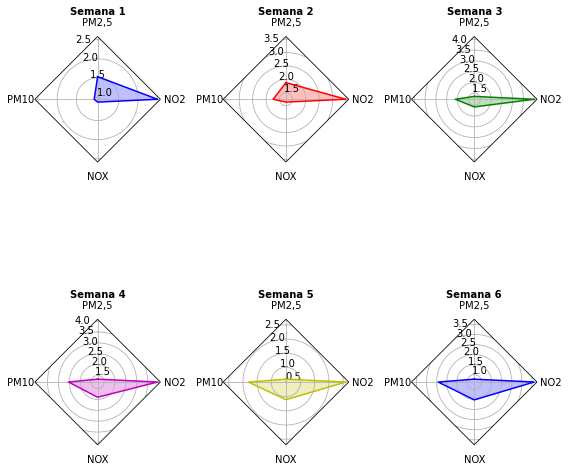

In [ ]:
alldata = []
alldata.append(dataset1)
alldata.append(dataset2)
alldata.append(dataset3)
alldata.append(dataset4)
title = 'Contaminantes-'+año
spoke_labels = ['PM2,5','PM10','NOX','NO2']
titles = titles = ['Semana 1', 'Semana 2', 'Semana 3', 'Semana 4', 'Semana 5', 'Semana 6']
colors = ['b', 'r', 'g', 'm', 'y', 'b']
visualization_spiderwebs.create_spiderwebs(alldata, 4, 6, title, titles, spoke_labels, colors, 'polygon')